In [49]:
import risk
import game
import missions
import player
import board
reload(risk), reload(game), reload(missions), reload(player), reload(board)
import copy, random, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from multiprocessing import Pool
%matplotlib inline

In [50]:
def play_game(n_players, players):
    p = [copy.deepcopy(random.choice(players)) for i in range(n_players)]
    g = game.Game.create(p)
    g.initialize_armies()
    while not g.has_ended():
        g.play_turn()
    return {
        'turn': g.turn, 
        'winner': g.winner(), 
        'winning_player' : g.players[g.winner()].description,
        'winning_mission': g.missions[g.winner()].description}

In [51]:
players = [
    player.RandomPlayer(),
    player.RuleBasedPlayer(),
    player.FortifyingPlayer(),
    player.PlacingPlayer(),
    player.TPlacingPlayer()
]

In [52]:
def plot_hbar(df, dimension, ax=None):
    vc = pd.DataFrame(df[dimension].value_counts())
    vc['error'] = np.sqrt(vc[dimension])
    ax = vc.plot(kind='barh', xerr='error', ax=ax)
    ax.set_title(dimension)
    return ax

In [53]:
def test_players(players, n_games=100, n_players=4):
    start = datetime.datetime.now()
    results = [play_game(n_players, players) for i in range(n_games)]
    end   = datetime.datetime.now()
    print '{n} games in {t}; {f} seconds per game'.format(n=n_games, 
                                                          t=(end-start), 
                                                          f=((end-start)/n_games).total_seconds())
    df = pd.DataFrame(results)
    plt.figure(1, figsize=(12, 12))
    ax = plt.subplot(3,1,1)
    ax = df['turn'].hist()
    ax = plt.subplot(3,1,2)
    ax = plot_hbar(df, 'winning_mission', ax=ax)
    ax = plt.subplot(3,1,3)
    ax = plot_hbar(df, 'winning_player', ax=ax)
    plt.show()
    return df



100 games in 0:00:07.043292; 0.070432 seconds per game


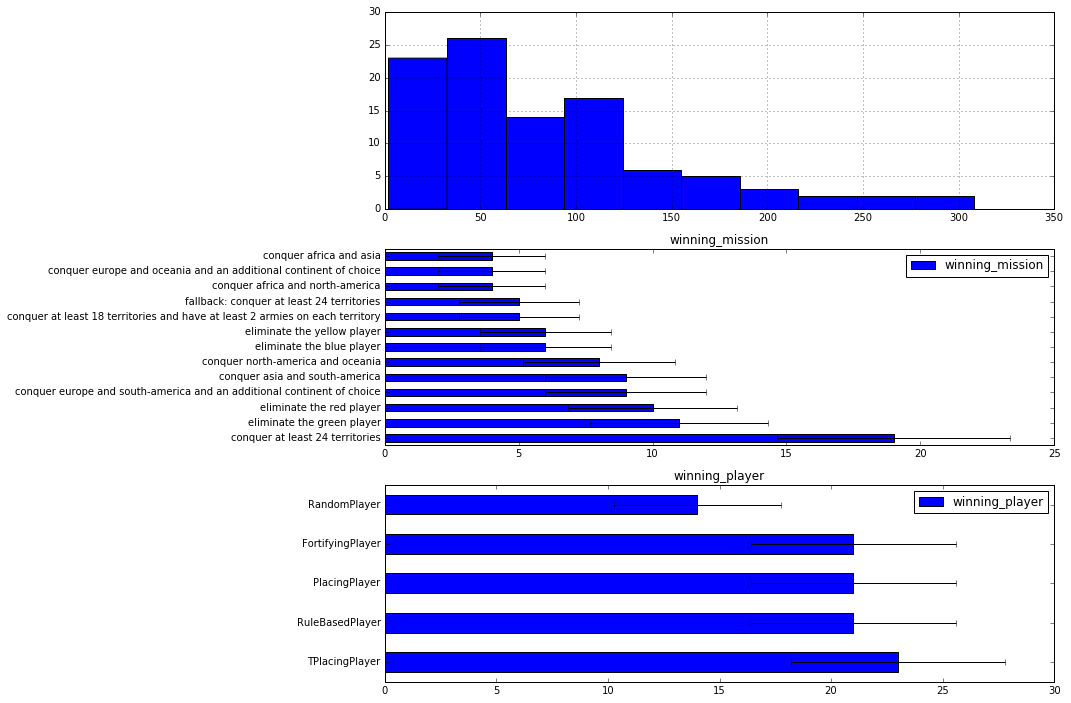

In [54]:
df = test_players(players, n_games=100)

1000 games in 0:01:12.456045; 0.072456 seconds per game


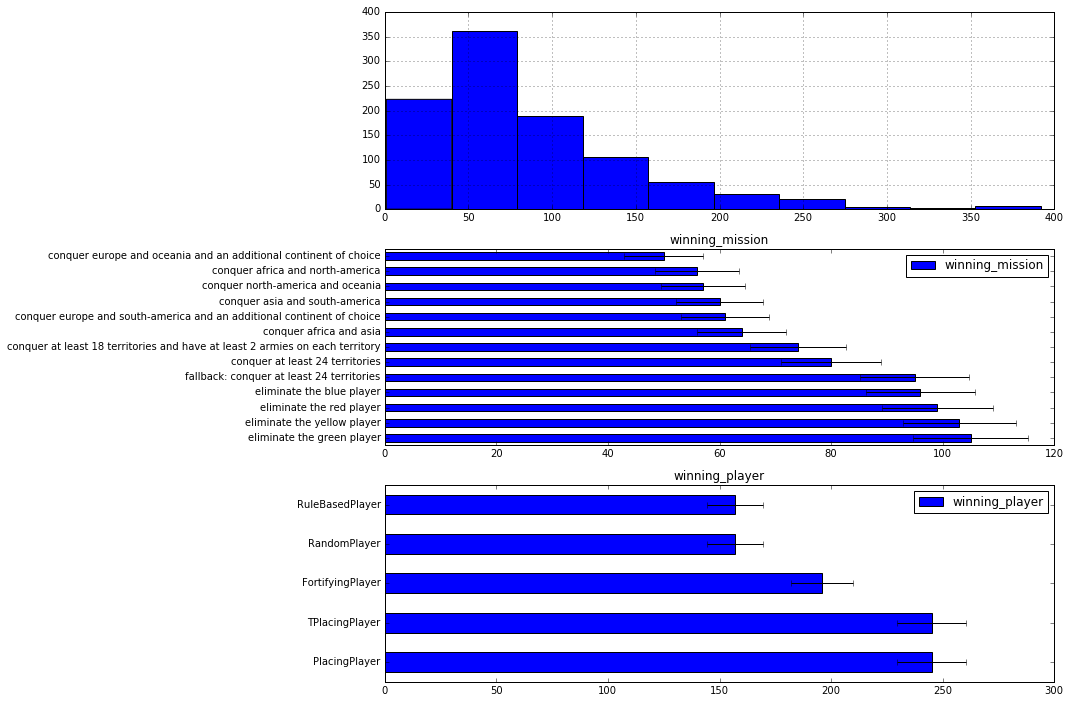

In [55]:
df = test_players(players, n_games=1000)

10000 games in 0:12:00.544945; 0.072054 seconds per game


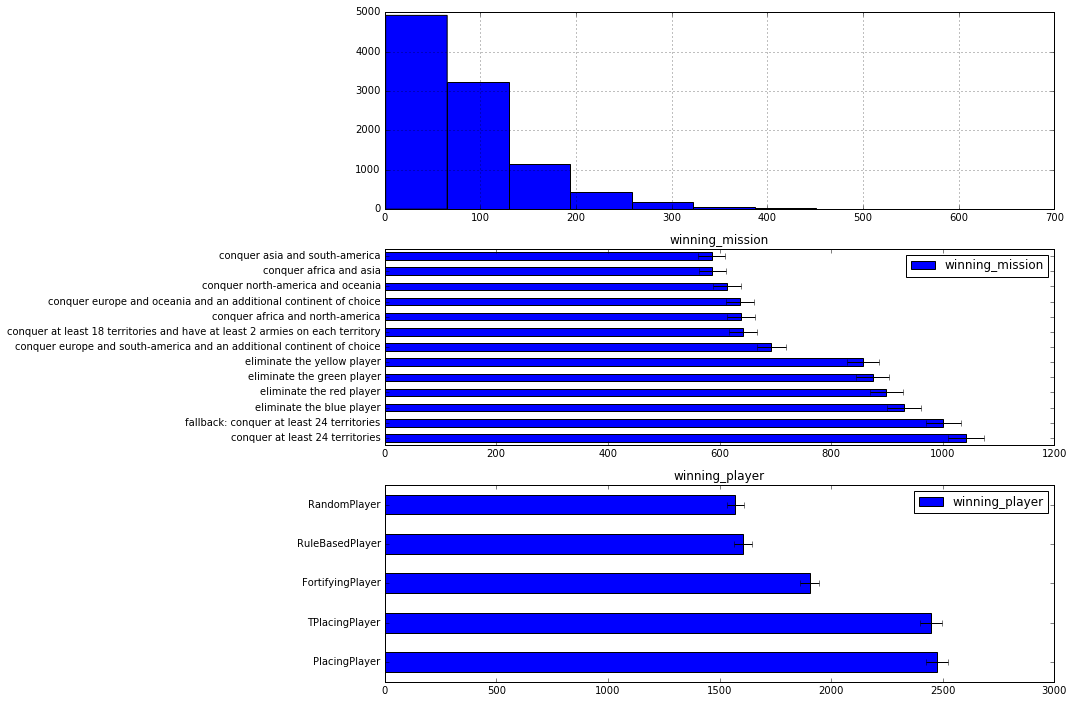

In [56]:
df = test_players(players, n_games=10000)

10000 games in 0:56:03.547253; 0.336354 seconds per game


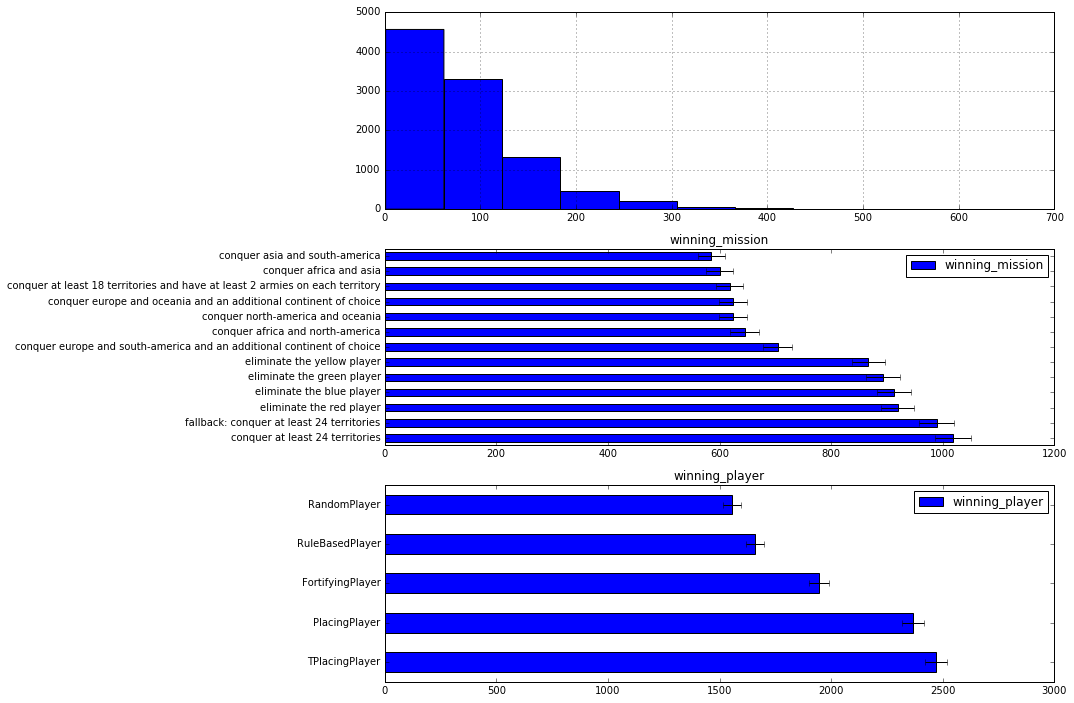

In [57]:
df = test_players(players, n_games=10000)